In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datasets = ['brca', 'gbsg2', 'whas500', 'microbiome']
n_clients = [1, 3, 5]
types = ['smpc', 'federated']

dfs = []
for dataset in datasets:
    for n_client in n_clients:
        for t in types:
            try:
                df = pd.read_csv(f'runtime_records/times_fc_survival_svm_{dataset}_{n_client}_{t}.csv')
                df['type'] = t
                dfs.append(df)
            except FileNotFoundError:
                continue


runtime_data = pd.concat(dfs).drop("0", axis=1).reset_index(drop=True)
runtime_data.columns = ['dataset', 'number of clients', 'runtime (in s)', 'type']
runtime_data['number of clients'] = runtime_data['number of clients'].astype(str)
display(runtime_data)

,dataset,number of clients,runtime (in s),type
0,brca,1,90.274939,federated
1,brca,3,288.626965,smpc
2,brca,3,92.725231,federated
3,brca,5,1916.207677,smpc
4,brca,5,89.481026,federated
5,gbsg2,1,78.185946,federated
6,gbsg2,3,503.324528,smpc
7,gbsg2,3,78.547509,federated
8,gbsg2,5,2650.173187,smpc
9,gbsg2,5,77.993988,federated


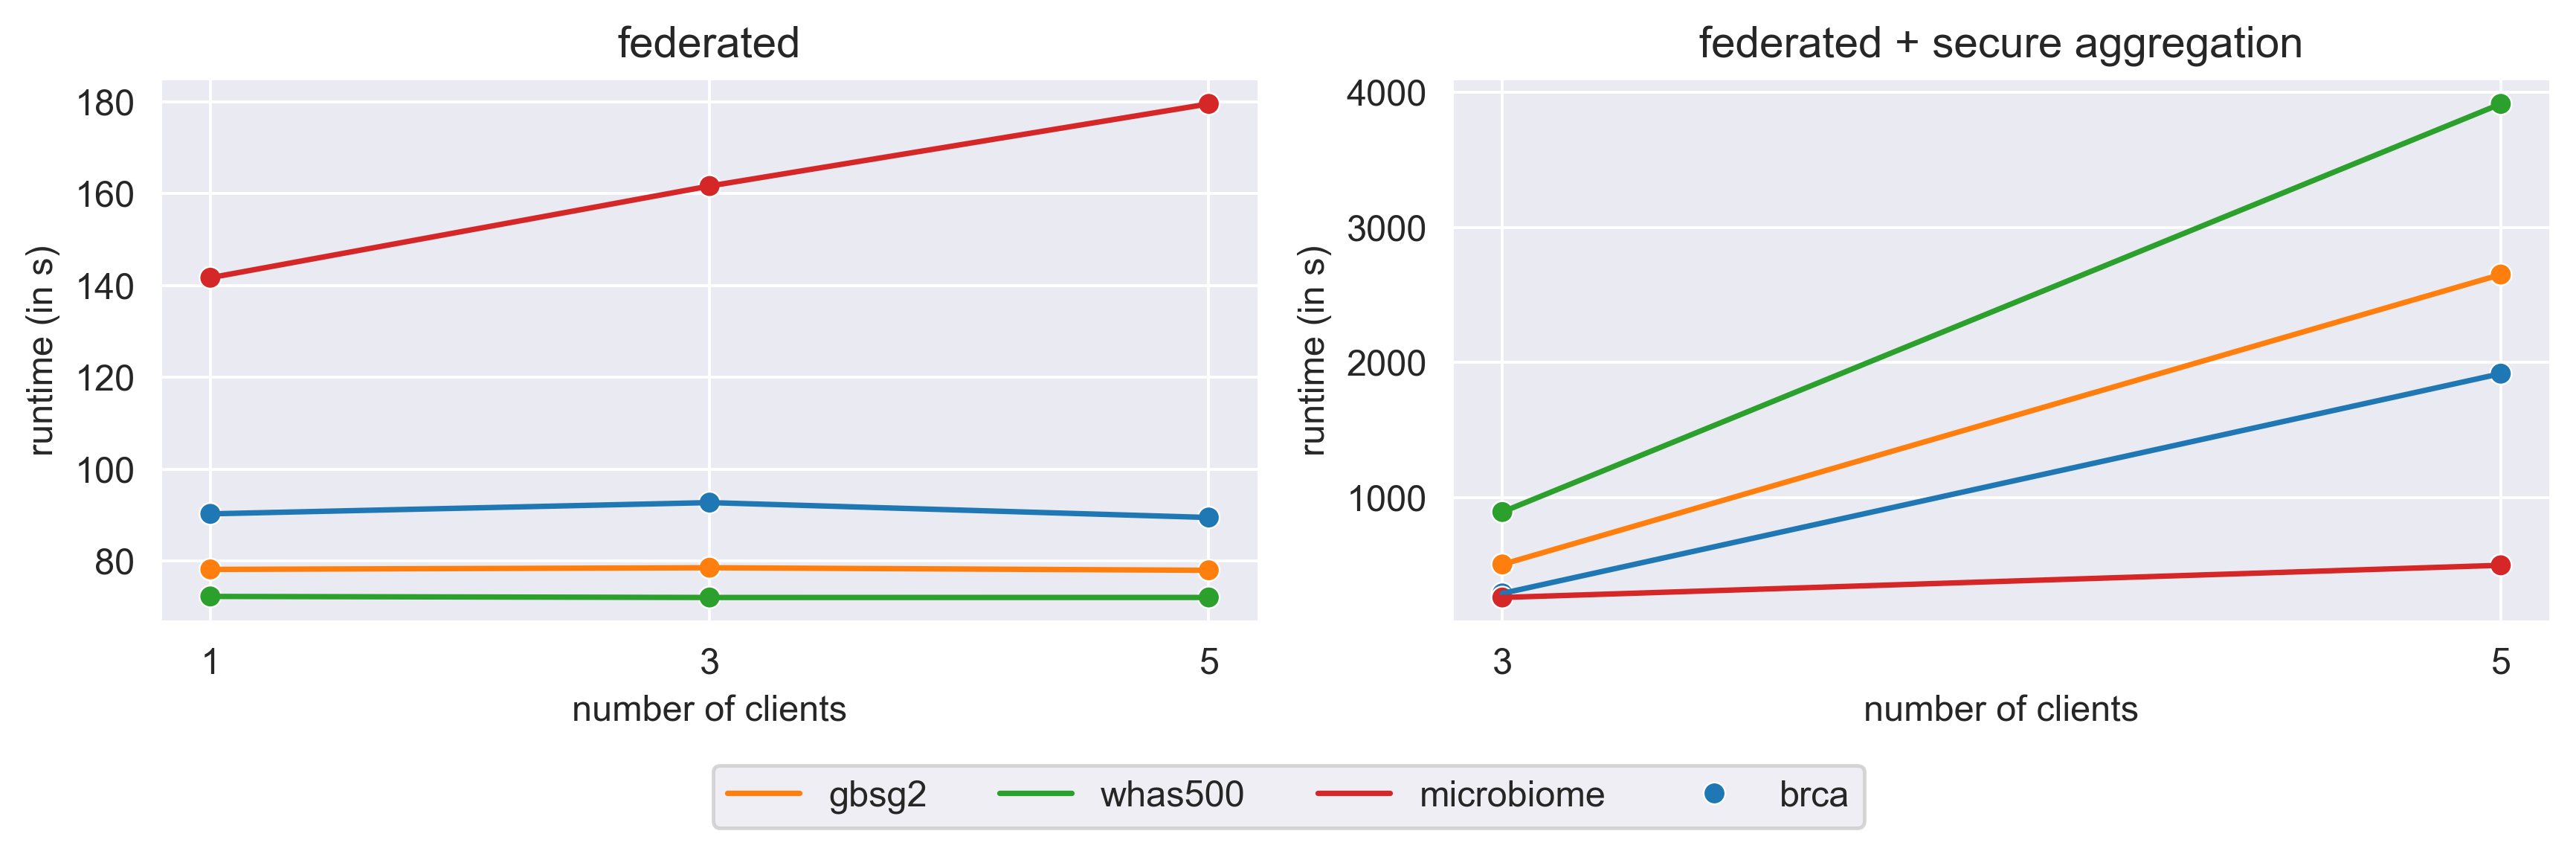

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3), dpi=350)

i = 0
for type in ['federated', 'smpc']:
    df = runtime_data[runtime_data['type'] == type]
    ax = axes[i]
    if type == 'smpc':
        type = 'federated + secure aggregation'
    ax.set_title(type)
    hue_order = ['brca', 'gbsg2', 'whas500', 'microbiome']
    sns.lineplot(data=df, x="number of clients", y="runtime (in s)", hue="dataset", hue_order=hue_order, ax=ax)
    sns.scatterplot(data=df, x="number of clients", y="runtime (in s)", hue="dataset", hue_order=hue_order, ax=ax)
    i += 1
    if i == 1:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()

plt.tight_layout()
fig.legend(handles[1:5], labels[1:5], loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.1))

plt.show()
fig.savefig('runtime.png', dpi=300)

plt.show()

In [4]:
runtime_data.to_csv('runtime_data.csv', index=False)